In [1]:
import time
import subprocess as subp

import matplotlib.pyplot as plt
import numpy as np

In [20]:
pattern = "book"

text_file_list = ["samples/english.50MB", "samples/english.100MB", "samples/english.200MB"]

x = [50, 100, 200]

In [21]:
y_shiftor = []
y_boyer = []
y_grep = []

for text_file in text_file_list:

    t1 = time.time()
    subp.check_call(["pmt", "-l", "-a", "shiftor", pattern, text_file])
    t2 = time.time()
    y_shiftor.append(t2 - t1)

    t1 = time.time()
    subp.check_call(["pmt", "-l", "-a", "boyermoore", pattern, text_file])
    t2 = time.time()
    y_boyer.append(t2 - t1)

    t1 = time.time()
    subp.check_call(["grep", "-c", pattern, text_file])
    t2 = time.time()
    y_grep.append(t2 - t1)

The pattern book was found in 2043 lines in the given text.
The pattern book occurred in 1949 lines of the given text.
1949
The pattern book was found in 5702 lines in the given text.
The pattern book occurred in 5248 lines of the given text.
5248
The pattern book was found in 11868 lines in the given text.
The pattern book occurred in 11411 lines of the given text.
11413


In [22]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR

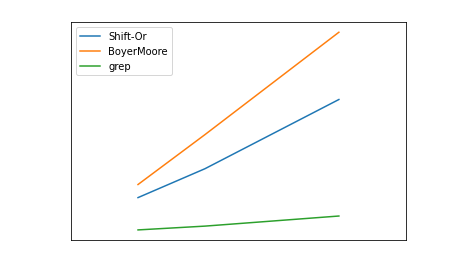

In [23]:
# plot
fig, ax = plt.subplots()

ax.plot(x, y_shiftor, label='Shift-Or')
ax.plot(x, y_boyer, label='BoyerMoore')
ax.plot(x, y_grep, label='grep')

ax.set(xlim=(0, 250), xticks=np.arange(50, 250, 50))

plt.title("Eficiência dos algoritmos de busca exata de acordo com o tamanho do texto")
plt.xlabel("Tamanho do arquivo em MBs")
plt.ylabel("Tempo de execução")

plt.legend(labelcolor='black', loc='best')
plt.show()